In [14]:
#Import the packages
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt 
import warnings
from sklearn.metrics import confusion_matrix, classification_report
warnings.filterwarnings('ignore')
from keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
from keras_preprocessing import image
import seaborn as sns
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Activation, Dense, Conv2D, Flatten, MaxPooling2D,BatchNormalization,Dropout

In [25]:
#Images loading
dir = 'C://Vishwanath/Wonders of World/'
gene=ImageDataGenerator()
training_data = gene.flow_from_directory(dir,target_size=(200, 200),batch_size=32)
clas = list(training_data.class_indices.keys())

Found 2196 images belonging to 7 classes.


In [26]:
#Visualising the original images
def visualise_img(location):
    img = image.load_img(location, target_size=(200,200,3))
    plt.imshow(img)
    plt.show()

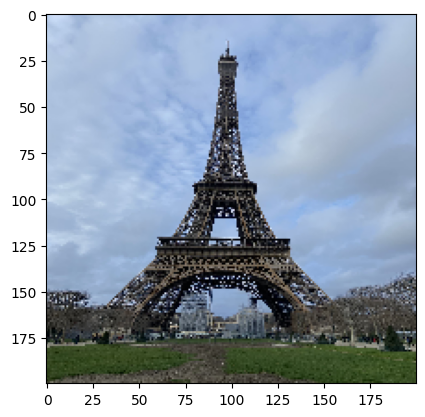

In [27]:
#Loading images
visualise_img("C://Vishwanath/Wonders of World/eiffel_tower/1b32a19bf1.jpg")

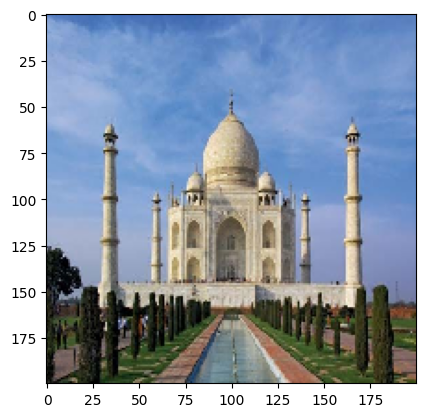

In [28]:
#Loading images
visualise_img("C://Vishwanath/Wonders of World/taj_mahal/2c42cd7a31.jpg")

In [29]:
#Wonders of World identification using CNN
wonders_world_iden_model = Sequential()
wonders_world_iden_model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(200,200,3)))
wonders_world_iden_model.add(MaxPooling2D(pool_size=(2,2)))
wonders_world_iden_model.add(BatchNormalization())
wonders_world_iden_model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
wonders_world_iden_model.add(MaxPooling2D(pool_size=(2,2)))
wonders_world_iden_model.add(Dropout(0.30))
wonders_world_iden_model.add(BatchNormalization())
wonders_world_iden_model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
wonders_world_iden_model.add(MaxPooling2D(pool_size=(2,2)))
wonders_world_iden_model.add(Dropout(0.30))
wonders_world_iden_model.add(BatchNormalization())
wonders_world_iden_model.add(Flatten())
wonders_world_iden_model.add(Dropout(0.30))
wonders_world_iden_model.add(Dense(128, activation='softmax'))
wonders_world_iden_model.add(Dense(len(clas),activation='relu'))

In [30]:
#CNN model compilation
wonders_world_iden_model.compile(optimizer=RMSprop(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [31]:
#CNN model summary
wonders_world_iden_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_9 (Batc  (None, 99, 99, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_10 (Conv2D)          (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 48, 48, 64)       0         
 g2D)                                                            
                                                      

In [32]:
#Model building output
history = wonders_world_iden_model.fit(training_data, epochs=32)

Epoch 1/32
69/69 [==============================] - 114s 2s/step - loss: 0.6970 - accuracy: 0.3128
Epoch 2/32
69/69 [==============================] - 149s 2s/step - loss: 0.5620 - accuracy: 0.4085
Epoch 3/32
69/69 [==============================] - 169s 2s/step - loss: 0.6165 - accuracy: 0.4499
Epoch 4/32
69/69 [==============================] - 166s 2s/step - loss: 0.7767 - accuracy: 0.3734
Epoch 5/32
69/69 [==============================] - 165s 2s/step - loss: 0.6209 - accuracy: 0.3862
Epoch 6/32
69/69 [==============================] - 1733s 25s/step - loss: 0.5692 - accuracy: 0.3944
Epoch 7/32
69/69 [==============================] - 148s 2s/step - loss: 0.5356 - accuracy: 0.4731
Epoch 8/32
69/69 [==============================] - 115s 2s/step - loss: 0.4973 - accuracy: 0.5241
Epoch 9/32
69/69 [==============================] - 132s 2s/step - loss: 0.4976 - accuracy: 0.5342
Epoch 10/32
69/69 [==============================] - 124s 2s/step - loss: 0.4684 - accuracy: 0.5587
Epoch 1

Text(0, 0.5, 'Accuracy Value')

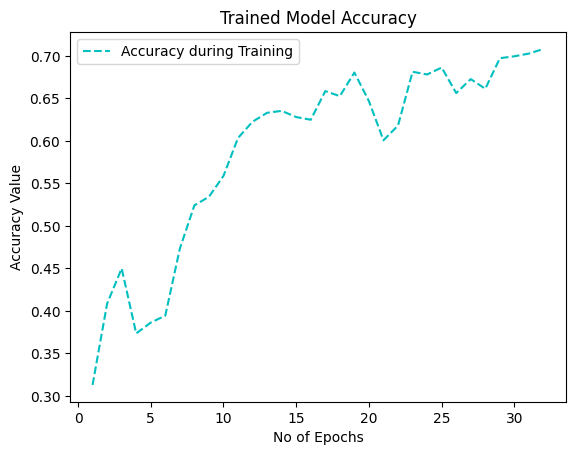

In [33]:
#CNN model accuracy
acc = history.history['accuracy']
tr_loss = history.history['loss']
epo = range(1, len(tr_loss) + 1)
plt.plot(epo, acc, 'c--')
plt.legend(['Accuracy during Training'])
plt.xlabel('No of Epochs')
plt.title("Trained Model Accuracy")
plt.ylabel('Accuracy Value')

Text(0, 0.5, 'Loss Value')

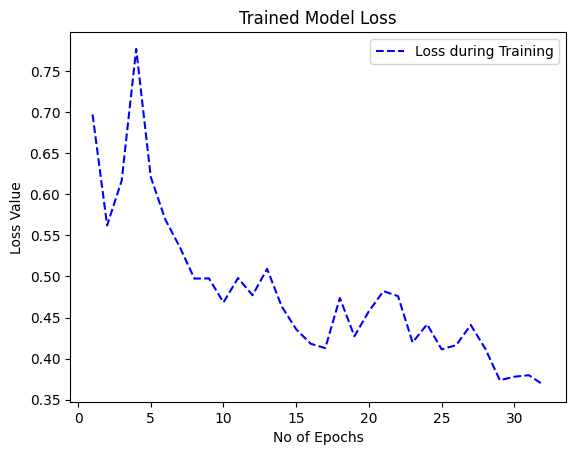

In [34]:
#CNN model loss
acc = history.history['accuracy']
tr_loss = history.history['loss']
epo = range(1, len(tr_loss) + 1)
plt.plot(epo, tr_loss, 'b--')
plt.legend(['Loss during Training'])
plt.xlabel('No of Epochs')
plt.title("Trained Model Loss")
plt.ylabel('Loss Value')